In [ ]:
from google.colab import drive
import os

# Check if the mount point exists and is not empty, then remove its contents
mountpoint = '/content/drive'

drive.mount(mountpoint)

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K

def focal_loss_fixed(y_true, y_pred, gamma=2., alpha=.25):
    """
    Focal loss for binary classification.
    """
    eps = K.epsilon()
    y_pred = K.clip(y_pred, eps, 1. - eps)

    loss_pos = -alpha * K.pow(1 - y_pred, gamma) * y_true * K.log(y_pred)
    loss_neg = -(1 - alpha) * K.pow(y_pred, gamma) * (1 - y_true) * K.log(1 - y_pred)

    return K.sum(loss_pos + loss_neg, axis=1)


In [ ]:
from tensorflow.keras.models import load_model
import os

ensemble_dir = "/content/drive/MyDrive/Project/solarPanelDefectDetection_Binary/balancedClasses"
ensemble_models = []

for root, dirs, files in os.walk(ensemble_dir):
    for f in files:
        if f.endswith(".keras"):
            path = os.path.join(root, f)
            print(f"Loading {path}")
            model = load_model(path, custom_objects={'focal_loss_fixed': focal_loss_fixed})
            ensemble_models.append(model)

print(f"Successfully loaded {len(ensemble_models)} ensemble models.")


Loading /content/drive/MyDrive/Project/solarPanelDefectDetection_Binary/balancedClasses/model_results/SplitBalanced_batch_1_ResNet50.keras
Loading /content/drive/MyDrive/Project/solarPanelDefectDetection_Binary/balancedClasses/model_results/SplitBalanced_batch_1_VGG16.keras
Loading /content/drive/MyDrive/Project/solarPanelDefectDetection_Binary/balancedClasses/model_results/SplitBalanced_batch_1_InceptionV3.keras
Loading /content/drive/MyDrive/Project/solarPanelDefectDetection_Binary/balancedClasses/model_results/SplitBalanced_batch_1_EfficientNetB0.keras
Loading /content/drive/MyDrive/Project/solarPanelDefectDetection_Binary/balancedClasses/model_results/SplitBalanced_batch_1_MobileNetV2.keras
Loading /content/drive/MyDrive/Project/solarPanelDefectDetection_Binary/balancedClasses/model_results/SplitBalanced_batch_2_ResNet50.keras
Loading /content/drive/MyDrive/Project/solarPanelDefectDetection_Binary/balancedClasses/model_results/SplitBalanced_batch_2_VGG16.keras
Loading /content/driv

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 90 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 70 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 52 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved op

Successfully loaded 21 ensemble models.


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 82 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
!ls /content/drive/MyDrive/Project/solarPanelDefectDetection_Binary/binaryClassification/test/defective/

'Electrical (14).jpg'  'Electrical (32).jpg'  'Electrical (7).jpg'
'Electrical (15).jpg'  'Electrical (39).jpg'  'Physical (14).jpg'
'Electrical (16).jpg'  'Electrical (56).jpg'  'Physical (33).jpg'
'Electrical (28).jpg'  'Electrical (58).jpg'  'Physical (42).jpg'
'Electrical (29).jpg'  'Electrical (62).jpg'  'Physical (53).jpg'
'Electrical (30).jpg'  'Electrical (6).jpg'   'Physical (64).jpg'


In [ ]:
!ls /content/drive/MyDrive/Project/solarPanelDefectDetection_Binary/binaryClassification/test/non_defective/

'Bird (104).jpg'  'Bird (55).jpg'    'Clean (63).jpg'  'Snow (114).jpg'
'Bird (121).jpg'  'Bird (70).jpg'    'Clean (67).jpg'  'Snow (14).jpg'
'Bird (123).jpg'  'Bird (74).jpg'    'Clean (70).jpg'  'Snow (15).jpg'
'Bird (126).jpg'  'Bird (77).jpg'    'Clean (84).jpg'  'Snow (1).jpg'
'Bird (128).jpg'  'Clean (103).jpg'  'Clean (87).jpg'  'Snow (26).jpg'
'Bird (139).jpg'  'Clean (11).jpg'   'Clean (95).jpg'  'Snow (28).JPG'
'Bird (140).jpg'  'Clean (125).jpg'  'Clean (9).jpg'   'Snow (41).jpg'
'Bird (170).JPG'  'Clean (128).jpg'  'Dust (101).jpg'  'Snow (50).jpg'
'Bird (179).JPG'  'Clean (132).jpg'  'Dust (103).jpg'  'Snow (60).jpg'
'Bird (187).jpg'  'Clean (137).jpg'  'Dust (142).jpg'  'Snow (64).jpg'
'Bird (18).jpg'   'Clean (13).jpg'   'Dust (14).jpg'   'Snow (70).jpg'
'Bird (191).jpg'  'Clean (141).JPG'  'Dust (167).jpg'  'Snow (74).jpg'
'Bird (192).jpg'  'Clean (152).jpg'  'Dust (171).jpg'  'Snow (7).jpg'
'Bird (196).jpg'  'Clean (170).jpg'  'Dust (177).jpg'  'Snow (85).jpg'
'Bird (

In [ ]:
# Assuming you used an ImageDataGenerator originally like this:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = "/content/drive/MyDrive/Project/solarPanelDefectDetection_Binary/binaryClassification/test"

datagen = ImageDataGenerator(rescale=1./255)
test_gen = datagen.flow_from_directory(test_dir, target_size=(224,224), batch_size=1, class_mode='categorical')

print("Class indices:", test_gen.class_indices)


Found 89 images belonging to 2 classes.
Class indices: {'defective': 0, 'non_defective': 1}


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_with_ensemble(img_path, ensemble_models):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Collect predictions from all models
    preds = [model.predict(img_array, verbose=0)[0][0] for model in ensemble_models]
    avg_pred = np.mean(preds)

    print(f"Raw prediction probabilities: {avg_pred:.4f}")

    # Apply threshold (assuming 'defective':0, 'non_defective':1)
    if avg_pred > 0.5:
        print("Ensemble Prediction: Non-Defective")
    else:
        print("Ensemble Prediction: Defective")

    return avg_pred


In [ ]:
img_path = "/content/drive/MyDrive/Project/solarPanelDefectDetection_Binary/binaryClassification/test/defective/Physical (64).jpg"
predict_with_ensemble(img_path, ensemble_models)

Raw prediction probabilities: 0.3839
Ensemble Prediction: Defective


np.float32(0.38394764)

In [ ]:
img_path = "/content/drive/MyDrive/Project/solarPanelDefectDetection_Binary/binaryClassification/test/defective/Electrical (7).jpg"
predict_with_ensemble(img_path, ensemble_models)

Raw prediction probabilities: 0.3727
Ensemble Prediction: Defective


np.float32(0.37265697)

In [ ]:
img_path = "/content/drive/MyDrive/Project/solarPanelDefectDetection_Binary/binaryClassification/test/non_defective/Clean (183).jpg"
predict_with_ensemble(img_path, ensemble_models)

Raw prediction probabilities: 0.6446
Ensemble Prediction: Non-Defective


np.float32(0.6446125)

In [ ]:
img_path = "/content/drive/MyDrive/Project/solarPanelDefectDetection_Binary/binaryClassification/test/non_defective/Bird (77).jpg"
predict_with_ensemble(img_path, ensemble_models)

Raw prediction probabilities: 0.5968
Ensemble Prediction: Non-Defective


np.float32(0.5968124)

In [ ]:
img_path = "/content/drive/MyDrive/Project/solarPanelDefectDetection_Binary/binaryClassification/test/non_defective/Dust (77).jpg"
predict_with_ensemble(img_path, ensemble_models)

Raw prediction probabilities: 0.6826
Ensemble Prediction: Non-Defective


np.float32(0.68263346)

In [ ]:
img_path = "/content/drive/MyDrive/Project/solarPanelDefectDetection_Binary/binaryClassification/test/non_defective/Snow (9).jpg"
predict_with_ensemble(img_path, ensemble_models)

Raw prediction probabilities: 0.6429
Ensemble Prediction: Non-Defective


np.float32(0.6428608)

Loading /content/drive/MyDrive/Project/solarPanelDefectDetection_Binary/balancedClasses/model_results/SplitBalanced_batch_1_ResNet50.keras
Loading /content/drive/MyDrive/Project/solarPanelDefectDetection_Binary/balancedClasses/model_results/SplitBalanced_batch_1_VGG16.keras
Loading /content/drive/MyDrive/Project/solarPanelDefectDetection_Binary/balancedClasses/model_results/SplitBalanced_batch_1_InceptionV3.keras
Loading /content/drive/MyDrive/Project/solarPanelDefectDetection_Binary/balancedClasses/model_results/SplitBalanced_batch_1_EfficientNetB0.keras
Loading /content/drive/MyDrive/Project/solarPanelDefectDetection_Binary/balancedClasses/model_results/SplitBalanced_batch_1_MobileNetV2.keras
Loading /content/drive/MyDrive/Project/solarPanelDefectDetection_Binary/balancedClasses/model_results/SplitBalanced_batch_2_ResNet50.keras
Loading /content/drive/MyDrive/Project/solarPanelDefectDetection_Binary/balancedClasses/model_results/SplitBalanced_batch_2_VGG16.keras
Loading /content/driv

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 90 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 70 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 52 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved op


Successfully loaded 21 ensemble models.
Found 89 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Ensemble Test Accuracy: 94.38%

Classification Report:
               precision    recall  f1-score   support

    defective       0.84      0.89      0.86        18
non_defective       0.97      0.96      0.96        71

     accuracy                           0.94        89
    macro avg       0.91      0.92      0.91        89
 weighted avg       0.95      0.94      0.94        89



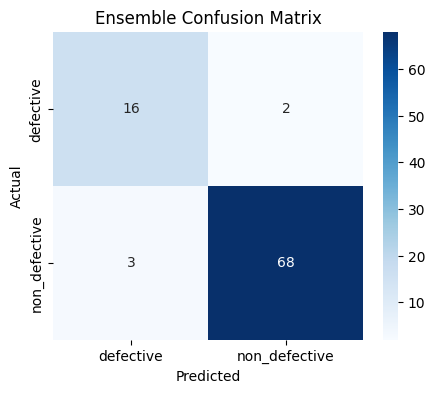

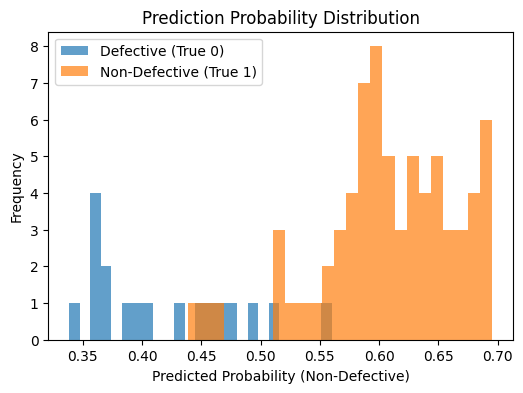

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

# =====================================================
# Load models (your code reused)
# =====================================================
from tensorflow.keras import backend as K

def focal_loss_fixed(y_true, y_pred, gamma=2., alpha=.25):
    eps = K.epsilon()
    y_pred = K.clip(y_pred, eps, 1. - eps)
    loss_pos = -alpha * K.pow(1 - y_pred, gamma) * y_true * K.log(y_pred)
    loss_neg = -(1 - alpha) * K.pow(y_pred, gamma) * (1 - y_true) * K.log(1 - y_pred)
    return K.sum(loss_pos + loss_neg, axis=1)

ensemble_dir = "/content/drive/MyDrive/Project/solarPanelDefectDetection_Binary/balancedClasses"
ensemble_models = []

for root, dirs, files in os.walk(ensemble_dir):
    for f in files:
        if f.endswith(".keras"):
            path = os.path.join(root, f)
            print(f"Loading {path}")
            model = tf.keras.models.load_model(path, custom_objects={'focal_loss_fixed': focal_loss_fixed})
            ensemble_models.append(model)

print(f"\nSuccessfully loaded {len(ensemble_models)} ensemble models.")

test_dir = "/content/drive/MyDrive/Project/solarPanelDefectDetection_Binary/binaryClassification/test"

test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

all_preds = []
for model in ensemble_models:
    preds = model.predict(test_gen, verbose=0)
    all_preds.append(preds)

# Average predictions across all models (soft voting)
ensemble_preds = np.mean(np.array(all_preds), axis=0)

# Convert probabilities to binary classes
y_pred = (ensemble_preds > 0.5).astype(int).flatten()
y_true = test_gen.classes
acc = accuracy_score(y_true, y_pred)
print(f"\nEnsemble Test Accuracy: {acc*100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=test_gen.class_indices.keys()))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_gen.class_indices.keys(),
            yticklabels=test_gen.class_indices.keys())
plt.title("Ensemble Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

plt.figure(figsize=(6,4))
plt.hist(ensemble_preds[y_true==0], bins=25, alpha=0.7, label="Defective (True 0)")
plt.hist(ensemble_preds[y_true==1], bins=25, alpha=0.7, label="Non-Defective (True 1)")
plt.title("Prediction Probability Distribution")
plt.xlabel("Predicted Probability (Non-Defective)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [ ]:
!ls -R /content/drive/MyDrive/Project/solarPanelDefectDetection_Reorganized

/content/drive/MyDrive/Project/solarPanelDefectDetection_Reorganized:
Classification	Defective  Non-Defective

/content/drive/MyDrive/Project/solarPanelDefectDetection_Reorganized/Classification:
test  train  val

/content/drive/MyDrive/Project/solarPanelDefectDetection_Reorganized/Classification/test:
Defective  Non-Defective

/content/drive/MyDrive/Project/solarPanelDefectDetection_Reorganized/Classification/test/Defective:
Electrical-damage  Physical-Damage

/content/drive/MyDrive/Project/solarPanelDefectDetection_Reorganized/Classification/test/Defective/Electrical-damage:
'Electrical (14).jpg'  'Electrical (2).png'   'Electrical (57).JPG'
'Electrical (18).jpg'  'Electrical (34).jpg'  'Electrical (75).jpg'
'Electrical (1).jpg'   'Electrical (4).JPG'   'Electrical (9).jpg'
'Electrical (28).jpg'  'Electrical (54).jpg'

/content/drive/MyDrive/Project/solarPanelDefectDetection_Reorganized/Classification/test/Defective/Physical-Damage:
'Physical (18).jpg'  'Physical (37).jpg'  'Physical

In [ ]:
import os
import pandas as pd
#Update this path if needed
base_dir = "/content/drive/MyDrive/Project/solarPanelDefectDetection_Reorganized"
# Supported image extensions
image_exts = ('.jpg', '.jpeg', '.png', '.JPG', '.PNG')
# Store results here
counts = []
# Walk through all directories
for root, dirs, files in os.walk(base_dir):
    image_files = [f for f in files if f.endswith(image_exts)]
    if image_files:
        counts.append({
            "Folder": root.replace(base_dir + "/", ""),
            "Image_Count": len(image_files)
        })
# Convert to DataFrame for easy viewing
df_counts = pd.DataFrame(counts).sort_values(by="Folder").reset_index(drop=True)
print("Image Counts per Folder:")
display(df_counts)
df_counts.to_csv("/content/image_counts.csv", index=False)
print("\nSaved counts to '/content/image_counts.csv'")


Image Counts per Folder:


,Folder,Image_Count
0,Classification/test/Defective/Electrical-damage,11
1,Classification/test/Defective/Physical-Damage,8
2,Classification/test/Non-Defective/Clean,20
3,Classification/test/Non-Defective/Non-Clean/Bi...,20
4,Classification/test/Non-Defective/Non-Clean/Bi...,2
5,Classification/test/Non-Defective/Non-Clean/Dusty,19
6,Classification/test/Non-Defective/Non-Clean/Sn...,13
7,Classification/train/Defective/Electrical-damage,72
8,Classification/train/Defective/Physical-Damage,48
9,Classification/train/Non-Defective/Clean,135



Saved counts to '/content/image_counts.csv'


In [ ]:
import os
import shutil
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, save_img

def balance_by_augment_safe(minority_dir, target_count, output_dir):
    # --- Step 1: Copy original folder to new location ---
    if os.path.exists(output_dir):
        print(f"Output folder already exists at {output_dir}")
    else:
        shutil.copytree(minority_dir, output_dir)
        print(f"Copied {minority_dir} -> {output_dir}")

    # --- Step 2: Work only inside the copied folder ---
    exts = ('.jpg','.jpeg','.png','.JPG','.PNG')
    existing = [f for f in os.listdir(output_dir) if f.endswith(exts)]
    current = len(existing)
    print("Current:", current, "Target:", target_count)
    if current >= target_count:
        print("Already balanced or larger. No augmentation needed.")
        return

    datagen = ImageDataGenerator(
        rotation_range=25,
        width_shift_range=0.08,
        height_shift_range=0.08,
        shear_range=0.08,
        zoom_range=0.12,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    idx = 0
    while current < target_count:
        for fname in existing:
            if current >= target_count:
                break
            img_path = os.path.join(output_dir, fname)
            try:
                img = load_img(img_path, target_size=(224,224))
                x = img_to_array(img)
                x = x.reshape((1,) + x.shape)
                gen = datagen.flow(x, batch_size=1)
                for _ in range(2):
                    batch = next(gen)
                    out_name = f"aug_{idx}_{fname}"
                    save_img(os.path.join(output_dir, out_name), batch[0])
                    idx += 1
                    current += 1
                    if current >= target_count:
                        break
            except Exception as e:
                print("skip", img_path, e)
        existing = [f for f in os.listdir(output_dir) if f.endswith(exts)]
    print("Done. New count:", current)

# --- Run safely ---
original = "/content/drive/MyDrive/Project/solarPanelDefectDetection_Reorganized/Defective/Physical-Damage"
augmented_copy = "/content/drive/MyDrive/Project/solarPanelDefectDetection_Reorganized/Defective/augmentedPhysical-Damage"
majority_count = 103

balance_by_augment_safe(original, majority_count, augmented_copy)


Copied /content/drive/MyDrive/Project/solarPanelDefectDetection_Reorganized/Defective/Physical-Damage -> /content/drive/MyDrive/Project/solarPanelDefectDetection_Reorganized/Defective/augmentedPhysical-Damage
Current: 69 Target: 103
Done. New count: 103


In [ ]:
import os
import shutil

base_path = "/content/drive/MyDrive/Project/solarPanelDefectDetection_Reorganized/Defective"
target_dir = "/content/drive/MyDrive/Project/solarPanelDefectDetection_Reorganized/Defective_Augmented"

# Create the new combined folder
os.makedirs(target_dir, exist_ok=True)

# Paths for source folders
electrical_src = os.path.join(base_path, "Electrical-damage")
physical_src = os.path.join(base_path, "augmentedPhysical-Damage")

# Create class folders inside the target
electrical_dst = os.path.join(target_dir, "Electrical-damage")
physical_dst = os.path.join(target_dir, "Physical-Damage")

os.makedirs(electrical_dst, exist_ok=True)
os.makedirs(physical_dst, exist_ok=True)

# Copy images
for src, dst in [(electrical_src, electrical_dst), (physical_src, physical_dst)]:
    for fname in os.listdir(src):
        fpath = os.path.join(src, fname)
        if os.path.isfile(fpath):
            shutil.copy(fpath, dst)

print("Combined dataset created at:", target_dir)


Combined dataset created at: /content/drive/MyDrive/Project/solarPanelDefectDetection_Reorganized/Defective_Augmented


In [ ]:
!pip install -q split-folders
import splitfolders
input_folder = "/content/drive/MyDrive/Project/solarPanelDefectDetection_Reorganized/Defective_Augmented"
output_folder = "/content/drive/MyDrive/Project/solarPanelDefectDetection_Reorganized/Defective_Augmented/Defective_split_balanced"
splitfolders.ratio(
    input_folder,
    output=output_folder,
    seed=1337,
    ratio=(0.7, 0.15, 0.15)
)
print("Split created at:", output_folder)


Copying files: 208 files [00:06, 33.33 files/s]

Split created at: /content/drive/MyDrive/Project/solarPanelDefectDetection_Reorganized/Defective_Augmented/Defective_split_balanced


In [ ]:
!ls /content/drive/MyDrive/Project

solarPanelDefectDetection_Binary  solarPanelDefectDetection_Reorganized


In [ ]:
!ls /content/drive/MyDrive/Project/solarPanelDefectDetection_Reorganized/Defective_Augmented

Defective_split_balanced  Electrical-damage  Physical-Damage


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import (
    VGG16, ResNet50, InceptionV3, MobileNetV2, EfficientNetB0
)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
base_dir = "/content/drive/MyDrive/Project/solarPanelDefectDetection_Reorganized/Defective_Augmented/Defective_split_balanced"
save_dir = "/content/drive/MyDrive/Project/solarPanelDefectDetection_Reorganized/Defective_Augmented/Defective_split_balanced/model_results"
os.makedirs(save_dir, exist_ok=True)
img_size = (224, 224)
batch_size = 32
num_classes = 2  # Electrical-damage vs Physical-Damage

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_gen = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)
val_gen = val_datagen.flow_from_directory(
    os.path.join(base_dir, 'val'),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)
test_gen = test_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 142 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Found 34 images belonging to 2 classes.
